# UltraLytics YOLO v5 Custom Data Image Detection 직접하기

## UltraLytics YOLO v5 설치

![install](https://github.com/DrKAI/CV/raw/main/UltraLytics_manual/yolov5_install.png)

[Install Page](https://github.com/ultralytics/yolov5)

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 15305, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15305 (delta 0), reused 4 (delta 0), pack-reused 15300
Receiving objects: 100% (15305/15305), 14.19 MiB | 19.40 MiB/s, done.
Resolving deltas: 100% (10493/10493), done.


In [2]:
temp_str = 'setuptools<=64.0.2\n'

f = open('/content/yolov5/requirements.txt','r')
f_str = f.readlines()
f.close()

f2 = open('/content/yolov5/requirements.txt', 'w')

for idx, val in enumerate(f_str) :
  if 'setuptools' in val:
    idx_v = idx
    f_str.remove(val)
    f_str.insert(idx_v, temp_str)

for val in f_str:
  f2.write(val)

f2.close()

In [3]:
!cd yolov5; pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.3 MB/s eta 0:00:00


## Image Detection

1. **본인이 사전 작업한 CustomData yaml 다운로드**

2. pretrained 된 weights 다운로드
    - weights가 없으면 자동 다운로드

3. train.py 실행

4. **테스트용 이미지 다운로드**

4. detect.py 실행

### 1) **본인의 CustomData yaml 다운로드**

- CustomData yaml 사전 작업 필요

In [25]:
yaml_path = '/content/datasets/people_or_skateboard.yaml'

In [9]:
!mkdir /content/datasets; mkdir /content/datasets/people_or_skateboard;
!mkdir /content/datasets/people_or_skateboard/images; mkdir /content/datasets/people_or_skateboard/images/train
!mkdir /content/datasets/people_or_skateboard/labels; mkdir /content/datasets/people_or_skateboard/labels/train

### 2) Pretrained weights 다운로드

![Pretrained weights](https://github.com/DrKAI/CV/raw/main/UltraLytics_manual/yolov5_pretrained.png)

[Pretrained weights Page](https://github.com/ultralytics/yolov5)

In [7]:
!mkdir /content/yolov5/pretrained

In [33]:
!wget -o /content/yolov5/pretrained/yolov5l.pt https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5l.pt

### 3) train.py 실행

- 명령어 도움말 : python train.py -h

In [35]:
!cd yolov5; python train.py \
    --data '/content/datasets/people_or_skateboard.yaml' \
    --cfg '/content/yolov5/models/yolov5m.yaml' \
    --weights '/content/yolov5/pretrained/yolov5m.pt' \
    --epochs 1000 \
    --patience 5 \
    --img 640 \
    --project 'trained' \
    --name 'select' \
    --exist-ok
    # --device cpu 이 오류나는분들이 종종 있는데 보통 특정 이미지랑 yolo version이 안맞으면 이 오류가 뜨더라고요. yolov5s 말고 다른 pt를 받으셔서 시도해보시겠어요

train: weights=/content/yolov5/pretrained/yolov5m.pt, cfg=/content/yolov5/models/yolov5m.yaml, data=/content/datasets/people_or_skateboard.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1000, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=trained, name=select, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=5, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, ob

### 4) **테스트용 이미지 다운로드**

In [36]:
!mkdir /content/datasets/test

### 5) detect.py 실행

- 명령어 도움말 : python detect.py -h

In [56]:
!cd yolov5; python detect.py \
    --weights '/content/yolov5/trained/select/weights/best.pt' \
    --source '/content/datasets/test/' \
    --project '/content/yolov5/detected' \
    --name 'images' \
    --img 640 \
    --conf-thres 0.5 \
    --iou-thres 0.6 \
    --line-thickness 2 \
    --exist-ok 
    # --device CPU

detect: weights=['/content/yolov5/trained/select/weights/best.pt'], source=/content/datasets/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.6, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/yolov5/detected, name=images, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs
image 1/5 /content/datasets/test/13767230_1737726929815156_2719712269047402597_o.png: 384x640 3 peoples, 1 skateboard, 21.9ms
image 2/5 /content/datasets/test/13770519_1737726876481828_4473849040052260179_n.png: 576x640 4 peoples, 5 skateboards, 26.6ms
image 3/5 /content/datasets/test/2.png: 640x480 (no detec

## Detect Image 살펴보기

In [38]:
from IPython.display import Image
from google.colab import files

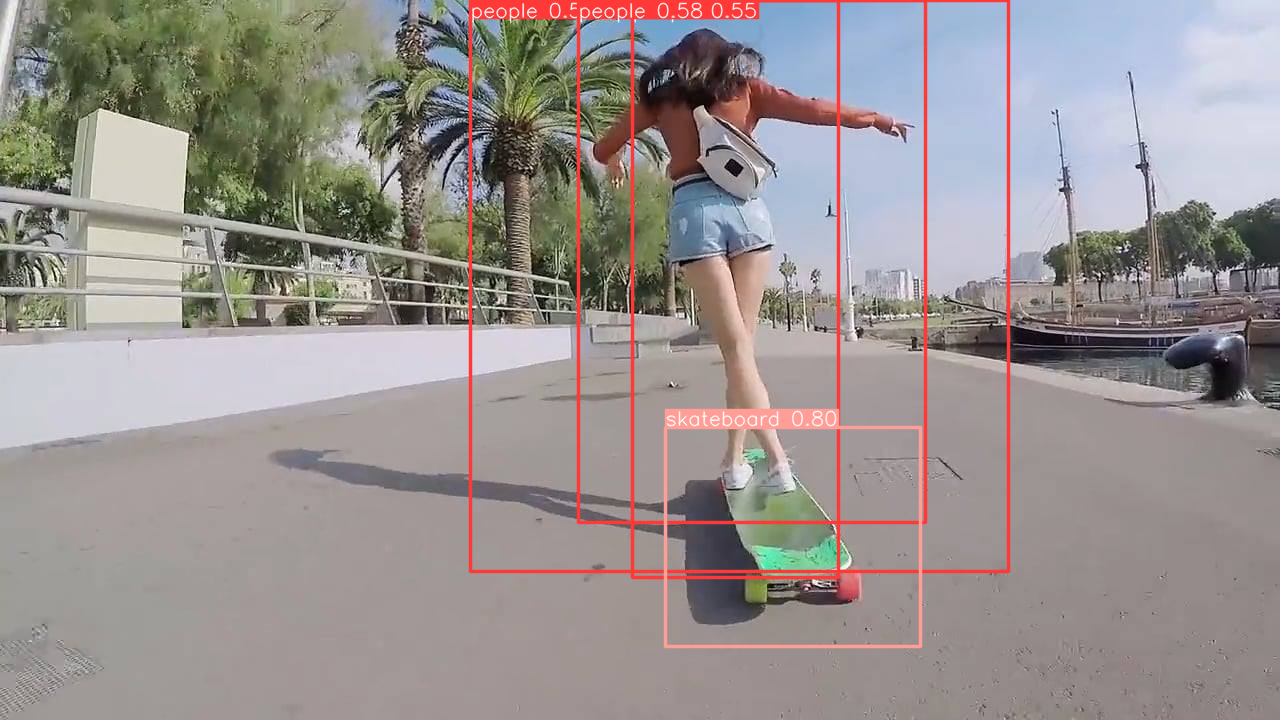

In [58]:
Image(filename='/content/yolov5/detected/images/13767230_1737726929815156_2719712269047402597_o.png', width=640)

In [62]:
files.download(filename='/content/yolov5/detected_images.zip')

FileNotFoundError: ignored

In [ ]:
/content/yolov5/detected/images